In [1]:
import glob
import ntpath
import time
import shutil
import subprocess
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

#ZOGY in Parallel routines
from zogyp.zip import run_ZOGY
from zogyp.zip import rdfits
from zogyp.zip import config_loc

#Image alignment
from zogyp.spali2 import spalipy

#Stacking
#from zogyp.zo_coadd import med_comb
#from zogyp.zo_coadd import prop_coad

LOC = config_loc()
t_f = LOC.replace('configfls','test')
T = [i for i in glob.glob(t_f+'/*')]

For a faster performance install pyfftw
 
 
 
/home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/configfls


#### For a fast alignment you can run straight from the subtraction command

In [2]:
run_ZOGY(T[0], T[1], align = True)
shutil.rmtree('Zoutput')

Parallell version, using 45 cores
Finding soure locations of /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/1_RD.fits
Finding soure locations of /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/2_RD.fits
9.807208986392009e-06


Making PSF catalog
Making PSF catalog
Modelling PSF for ./Zoutput/ref_cut1.fits
Modelling PSF for ./Zoutput/sci_cut1.fits


##### On occasions you will find that fits files are compressed in such a way that Sextractor cannot read them (TFORM not compatible). 
##### ZiP contains a function to re-make the fits so it is compatible with sextractor.

In [3]:
R = rdfits(T[0]) 
D = rdfits(T[1])

print('Remade file names \n', R, D)
subprocess.call(['rm', R, D])

Remade file names 
 /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/1_RD.fits /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/2_RD.fits


0

### Lets apply this to the spalipy function

Finding soure locations of /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/1_RD.fits
Finding soure locations of /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/2_RD.fits
9.807208986392009e-06


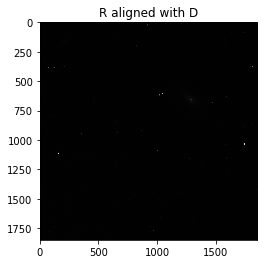

0

In [4]:
R = rdfits(T[0]) 
D = rdfits(T[1])

Name = spalipy(R, D, name='SPLINE.fits')
subprocess.call(['rm', R, D])
                
plt.imshow(fits.getdata(Name), cmap='gray')
plt.title('R aligned with D')
plt.show()

subprocess.call(['rm', 'SPLINE.fits'])

#### If you don't need a file name, you can also have it return the aligned data array

Finding soure locations of /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/1.fits
Finding soure locations of /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/2.fits
9.807208986392009e-06


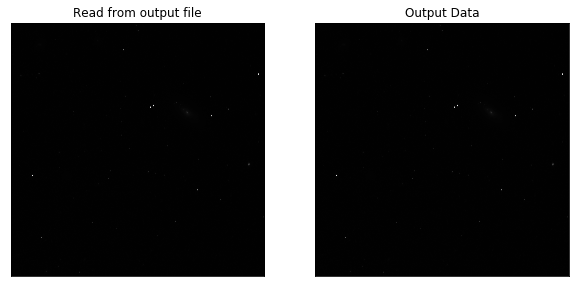

In [5]:
Name, OUT = spalipy(T[1],T[0], data=True)


fig, axs = plt.subplots(1, 2, figsize=(10,8))
D = fits.getdata('aligned.fits')
axs[0].imshow(D, cmap='gray')
axs[0].set_xticks([] , [])
axs[0].set_yticks([] , [])
axs[0].set_title('Read from output file')

axs[1].imshow(OUT, cmap='gray')
axs[1].set_xticks([] , [])
axs[1].set_yticks([] , [])
axs[1].set_title('Output Data')
plt.show()

#### Last, but not least. The spline is used for wide fields of view; however, not all fields are large enough to require the spline. As the spline takes time, an option is included to remove the spline and just use the affine transform alone. 

In [7]:
t = time.time()
ali = spalipy(T[0],T[1])
t1 = time.time() - t

t = time.time()
ali = spalipy(T[0], T[1], spline=False)
t2 = time.time() - t

subprocess.call(['rm', ali])
print('\n \n')
print('With spline '+str(t1)+' seconds')
print('No spline '+str(t2)+' seconds')

Finding soure locations of /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/1.fits
Finding soure locations of /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/2.fits
9.807208986392009e-06
Finding soure locations of /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/1.fits
Finding soure locations of /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/2.fits
9.807208986392009e-06

 

With spline 3.4922940731048584 seconds
No spline 2.0309555530548096 seconds
